#IMPORT

In [ ]:
import sys
import csv
import pandas as pd
import numpy as np
import random
import sklearn.metrics
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#DEFINITION OF AUXILIARY FUNCTIONS

Load Data

In [ ]:
def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)

    # Headers' list:
    headers = data.columns # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers)>1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y

Plot a confusion matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['0','1','2','3','4','5','6','7','8','9']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#DATASET 1

##Load Data

In [ ]:
X_1,Y_1 = load_data("/content/drive/MyDrive/Colab Notebooks/Machine Learning Exercises/Homework 1/dataset1.csv")

##Preprocess

Choose a type of preprocess for prepare the raw data so that it is suitable for training

In [ ]:
type_of_preprocessing = ['standard', 'minmax', 'normalize', None]
metric_for_normalization = ['l1', 'l2', 'max']

pre = type_of_preprocessing[0]

if(pre == 'standard'):
  scaler = preprocessing.StandardScaler()
  scaler.fit_transform(X_1)
elif(pre == 'minmax'):
  scaler = preprocessing.MinMaxScaler()
  scaler.fit_transform(X_1)
elif(pre == 'normalize'):
  n = metric_for_normalization[0] # used to normalize each non zero sample
  X_1 = preprocessing.normalize(X_1,norm=n)

**Print**

In [ ]:
print("Input shape: %s" %str(X_1.shape))
print("Output shape: %s" %str(Y_1.shape))
print("Number of attributes/features: %d" %(X_1.shape[1]))
print("Number of samples: %d" %(X_1.shape[0]))

# show an example
id = random.randrange(0,X_1.shape[0])

print("Example:")
print("x%d = %r" %(id,X_1[id]))
print("y%d = %r" %(id,Y_1[id]))

Input shape: (50000, 100)
Output shape: (50000,)
Number of attributes/features: 100
Number of samples: 50000
Example:
x15113 = array([0.        , 0.38196355, 0.        , 4.5100484 , 3.3207958 ,
       0.        , 0.19333893, 4.2144556 , 0.        , 0.        ,
       0.        , 0.18017566, 0.        , 0.        , 0.        ,
       0.        , 1.49788   , 0.        , 3.2095325 , 2.1662865 ,
       0.866846  , 3.9240644 , 3.7937484 , 2.3164237 , 0.2076561 ,
       0.        , 3.9575002 , 0.7519521 , 0.3364986 , 3.2990294 ,
       0.        , 0.        , 0.        , 2.5585818 , 0.        ,
       1.9448056 , 3.924943  , 2.1042893 , 7.455678  , 0.04674581,
       0.        , 0.        , 0.        , 5.7744927 , 0.        ,
       0.        , 0.        , 2.3145578 , 2.7090697 , 3.3256545 ,
       4.23927   , 5.7328973 , 0.41870612, 2.7110896 , 1.0301093 ,
       1.5938935 , 0.        , 1.9115968 , 0.84507024, 0.        ,
       0.        , 0.7515078 , 0.        , 0.        , 0.        ,
  

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


<BarContainer object of 10 artists>

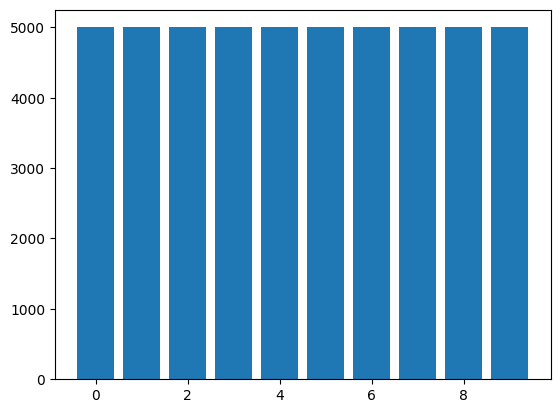

In [ ]:
class_values = {}
for i in range(0,10):
  class_values[i]=0
for c in Y_1:
  class_values[c]+=1
print(class_values)
plt.bar(class_values.keys(),class_values.values())

##Split Data

In [ ]:
# 80% train set, 20% test set

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=15)

**Print**

In [ ]:
print("Size of training set: %d" %X_train_1.shape[0])
print("Size of test set: %d" %X_test_1.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train_1[id]))
print("    y_train_%d = %r" %(id,y_train_1[id]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test_1[id]))
print("    y_test_%d = %r" %(id,y_test_1[id]))

Size of training set: 40000
Size of test set: 10000
First training sample
    x_train_0 = array([1.2816199 , 0.85749465, 0.        , 1.3946543 , 0.8434709 ,
       0.        , 1.9842827 , 2.4051332 , 0.        , 0.17946725,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 3.1655111 , 0.        , 0.45881706, 3.3371134 ,
       0.55247074, 0.        , 0.71675617, 0.64120835, 0.54357433,
       0.        , 2.5128384 , 0.15988272, 2.684928  , 2.919863  ,
       4.476648  , 0.        , 0.        , 0.681772  , 0.        ,
       3.0646522 , 2.7774305 , 1.1783743 , 3.2362728 , 0.        ,
       2.058738  , 0.9309574 , 2.2239563 , 0.        , 1.1719234 ,
       0.        , 0.        , 0.        , 2.4436133 , 0.61120486,
       3.0692868 , 1.5497496 , 0.        , 1.1953511 , 0.35778275,
       4.332593  , 0.        , 0.        , 3.867269  , 5.2404304 ,
       3.2007895 , 3.2604215 , 0.        , 0.        , 0.        ,
       1.407496  , 0.        , 2.037096

#LEARNING 1

##Create a models and Cross Validation


**Decision Tree**

In [ ]:
#hyperparameters: criteria of the split, strategy to split at each node, maximum depth of the tree
set_of_criteria = ['gini', 'entropy', 'log_loss']
type_of_split = ['best', 'random']
max_depth = np.array(range(1,31))

# K-Fold Cross-Validation

crit = set_of_criteria[0]
split = type_of_split[0]
depth = max_depth[0]
max_accuracy = 0.0

for c in set_of_criteria:
  for s in type_of_split:
    for d in max_depth:
      dt = tree.DecisionTreeClassifier(criterion=c, splitter=s, max_depth=d)
      score = cross_val_score(dt, X_train_1, y_train_1, cv=5, scoring='accuracy').mean()
      if(score > max_accuracy):
        max_accuracy = score
        crit = c
        split = s
        depth = d

print('the hyperparameters choosen are criterion=%s, split=%s, depth=%s and the max accuracy is %.3f' %(crit,split,str(depth),max_accuracy))

the hyperparameters choosen are criterion=gini, split=best, depth=12 and the max accuracy is 0.978


In [ ]:
decision_tree_1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=12)

**SVM**

In [ ]:
#hyperparameters:  kernel, degree of the polynomial function if kernel=='poly' (ignored by all other kernels), kernel coefficient for 'rbf', 'poly' and 'sigmoid' (gamma)
degree_range = [1,2,3]
kernel_set = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_set = ['scale','auto']

# K-Fold Cross-Validation

kernel_name  = kernel_set[0]
num_degree = degree_range[0]
g = gamma_set[0]
max_accuracy = 0.0

for k in kernel_set:
  for d in degree_range:
    for gg in gamma_set:
      if k!='linear':
        if k=='poly':
          sc=svm.SVC(C=1.0, kernel=k, degree=d, gamma=gg)
        else:
          sc=svm.SVC(C=1.0, kernel=k, gamma=gg)
      else:
        sc=svm.SVC(C=1.0, kernel=k)
      score = cross_val_score(sc, X_train_1, y_train_1, cv=5, scoring='accuracy').mean()
      if(score > max_accuracy):
        max_accuracy = score
        g = gg
        num_degree = d
        kernel_name = k

print('the hyperparameters choosen are kernel=%s, degree=%s, gamma=%s and the max accuracy is %.3f' %(kernel_name,str(num_degree),g,max_accuracy))

the hyperparameters choosen are kernel=poly, degree=1, gamma=scale and the max accuracy is 0.989


In [ ]:
svm_c_1 = svm.SVC(C=1.0, kernel='poly', degree=1, gamma='scale')

**KNN**

In [ ]:
#hyperparameters: number of nearest neighbors, weight function, Algorithm used to compute the nearest neighbors
neighbors_range = np.array(range(1,11))
weight_set = ['uniform','distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
#K-Fold Cross-Validation

num_neighbors = neighbors_range[0]
weight_type = weight_set[0]
alg = algorithms[0]
max_accuracy=0.0

for n in neighbors_range:
  for w in weight_set:
    for a in algorithms:
      nn=KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
      score = cross_val_score(nn, X_train_1, y_train_1, cv=5, scoring='accuracy').mean()
      if(score > max_accuracy):
        max_accuracy = score
        num_neighbors = n
        weight_type = w
        alg = a

print('the hyperparameters choosen are number of neighbors=%s, algorithm=%s, weights=%s and the max accuracy is %.3f' %(str(num_neighbors),alg,weight_type,max_accuracy))

the hyperparameters choosen are number of neighbors=9, algorithm=uniform, depth=auto and the max accuracy is 0.988


In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')

##Fit the models

In [ ]:
decision_tree_1.fit(X_train_1, y_train_1)

DecisionTreeClassifier(max_depth=12)

In [ ]:
svm_c_1.fit(X_train_1, y_train_1)

SVC(degree=1, kernel='poly')

In [ ]:
knn_1.fit(X_train_1, y_train_1)

KNeighborsClassifier(n_neighbors=9)

##Evaluate the models

###Accuracy

In [ ]:
acc1_1 = decision_tree_1.score(X_test_1, y_test_1)
print("Accuracy of decision tree is %.3f" %acc1_1)

Accuracy of decision tree is 0.978


In [ ]:
acc2_1 = svm_c_1.score(X_test_1, y_test_1)
print("Accuracy of SVM is %.3f" %acc2_1)

Accuracy of SVM is 0.988


In [ ]:
acc3_1 = knn_1.score(X_test_1, y_test_1)
print("Accuracy of KNN is %.3f" %acc3_1)

Accuracy of KNN is 0.988


###Precision and Recall

In [ ]:
print("Precision and Recall table of decision tree is:")
print(classification_report(y_test_1, decision_tree_1.predict(X_test_1), labels=None, target_names=['0','1','2','3','4','5','6','7','8','9'], digits=3))

Precision and Recall table of decision tree is:
              precision    recall  f1-score   support

           0      0.987     0.986     0.986      1036
           1      0.993     0.992     0.993      1008
           2      0.974     0.977     0.975       998
           3      0.941     0.941     0.941       958
           4      0.981     0.975     0.978       981
           5      0.954     0.957     0.955      1019
           6      0.977     0.989     0.983      1010
           7      0.986     0.985     0.985       969
           8      0.997     0.990     0.993       998
           9      0.990     0.990     0.990      1023

    accuracy                          0.978     10000
   macro avg      0.978     0.978     0.978     10000
weighted avg      0.978     0.978     0.978     10000



In [ ]:
print("Precision and Recall table of SVM is:")
print(classification_report(y_test_1, svm_c_1.predict(X_test_1), labels=None, target_names=['0','1','2','3','4','5','6','7','8','9'], digits=3))

Precision and Recall table of SVM is:
              precision    recall  f1-score   support

           0      0.993     0.991     0.992      1036
           1      0.997     0.994     0.996      1008
           2      0.991     0.988     0.989       998
           3      0.960     0.965     0.963       958
           4      0.991     0.993     0.992       981
           5      0.969     0.965     0.967      1019
           6      0.997     0.998     0.998      1010
           7      0.992     0.993     0.992       969
           8      0.996     0.997     0.996       998
           9      0.993     0.997     0.995      1023

    accuracy                          0.988     10000
   macro avg      0.988     0.988     0.988     10000
weighted avg      0.988     0.988     0.988     10000



In [ ]:
print("Precision and Recall table of KNN is:")
print(classification_report(y_test_1, knn_1.predict(X_test_1), labels=None, target_names=['0','1','2','3','4','5','6','7','8','9'], digits=3))

Precision and Recall table of KNN is:
              precision    recall  f1-score   support

           0      0.995     0.991     0.993      1036
           1      0.998     0.996     0.997      1008
           2      0.987     0.989     0.988       998
           3      0.955     0.958     0.957       958
           4      0.989     0.996     0.992       981
           5      0.968     0.961     0.965      1019
           6      0.995     0.997     0.996      1010
           7      0.995     0.994     0.994       969
           8      0.997     0.997     0.997       998
           9      0.995     0.996     0.996      1023

    accuracy                          0.988     10000
   macro avg      0.987     0.988     0.987     10000
weighted avg      0.988     0.988     0.988     10000



###Confusion Matrix

[[1021    1    5    1    1    1    2    0    1    3]
 [   1 1000    0    1    0    1    1    0    1    3]
 [   7    0  975    5    3    3    3    2    0    0]
 [   0    0    9  901    3   28   10    4    0    3]
 [   0    0    7    9  956    2    3    4    0    0]
 [   0    0    2   30    5  975    4    3    0    0]
 [   0    0    2    4    3    2  999    0    0    0]
 [   1    0    0    3    3    7    0  954    1    0]
 [   3    1    1    2    1    1    0    0  988    1]
 [   1    5    0    1    0    2    0    1    0 1013]]


<Axes: title={'center': 'Confusion matrix of decision tree'}, xlabel='Predicted label', ylabel='True label'>

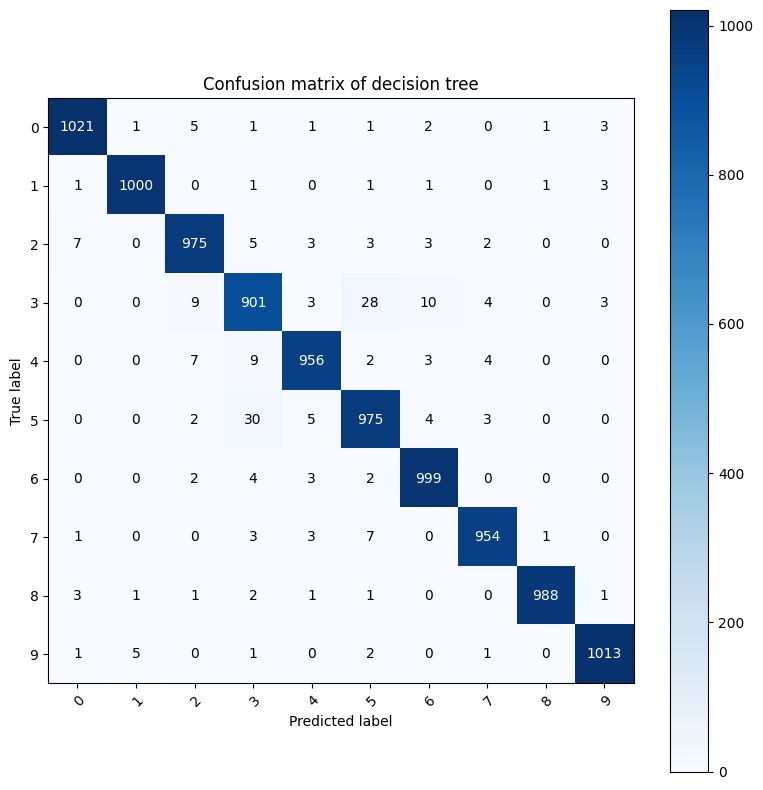

In [ ]:
cmd_1 = confusion_matrix(y_test_1, decision_tree_1.predict(X_test_1), labels=None, sample_weight=None)
print(cmd_1)
plt.rcParams["figure.figsize"] = (8,8)
plot_confusion_matrix(y_test_1, decision_tree_1.predict(X_test_1), classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix of decision tree')

[[1027    0    4    0    0    0    0    0    2    3]
 [   0 1002    0    1    0    0    0    0    1    4]
 [   6    0  986    3    1    1    0    1    0    0]
 [   0    0    3  924    2   25    2    1    1    0]
 [   0    0    1    2  974    1    0    3    0    0]
 [   0    0    0   28    4  983    1    3    0    0]
 [   0    0    0    2    0    0 1008    0    0    0]
 [   1    0    0    1    1    4    0  962    0    0]
 [   0    0    1    1    1    0    0    0  995    0]
 [   0    3    0    0    0    0    0    0    0 1020]]


<Axes: title={'center': 'Confusion matrix of SVM'}, xlabel='Predicted label', ylabel='True label'>

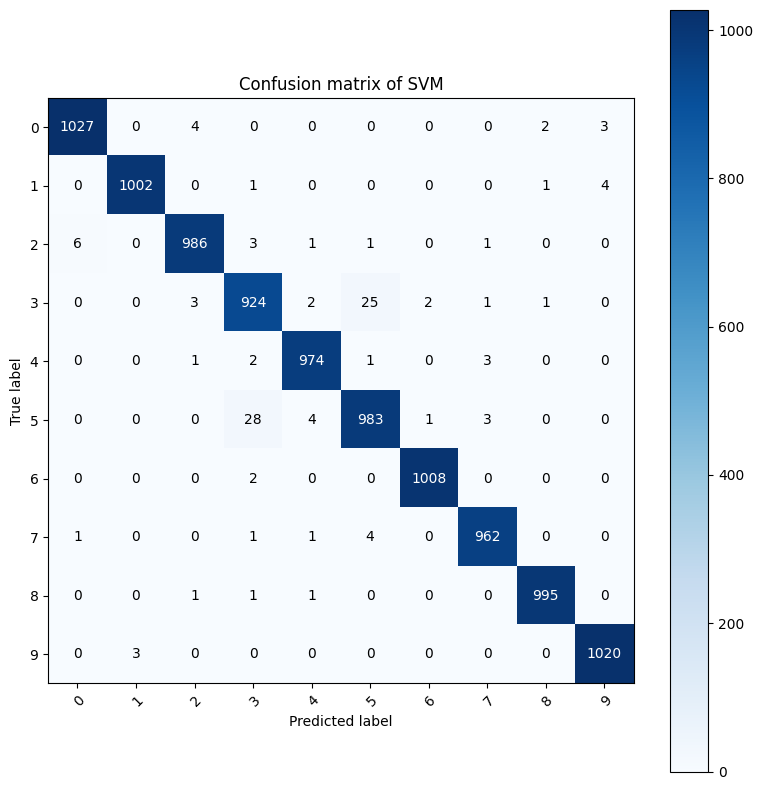

In [ ]:
cmsvm_1 = confusion_matrix(y_test_1, svm_c_1.predict(X_test_1), labels=None, sample_weight=None)
print(cmsvm_1)
plt.rcParams["figure.figsize"] = (8,8)
plot_confusion_matrix(y_test_1, svm_c_1.predict(X_test_1), classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix of SVM')

[[1027    0    5    0    0    0    0    0    2    2]
 [   0 1004    0    1    0    0    0    0    0    3]
 [   5    0  987    2    1    2    0    1    0    0]
 [   0    0    5  918    3   27    4    0    1    0]
 [   0    0    1    1  977    1    0    1    0    0]
 [   0    0    0   32    4  979    1    3    0    0]
 [   0    0    1    2    0    0 1007    0    0    0]
 [   0    0    0    2    2    2    0  963    0    0]
 [   0    0    1    1    1    0    0    0  995    0]
 [   0    2    0    2    0    0    0    0    0 1019]]


<Axes: title={'center': 'Confusion matrix of knn'}, xlabel='Predicted label', ylabel='True label'>

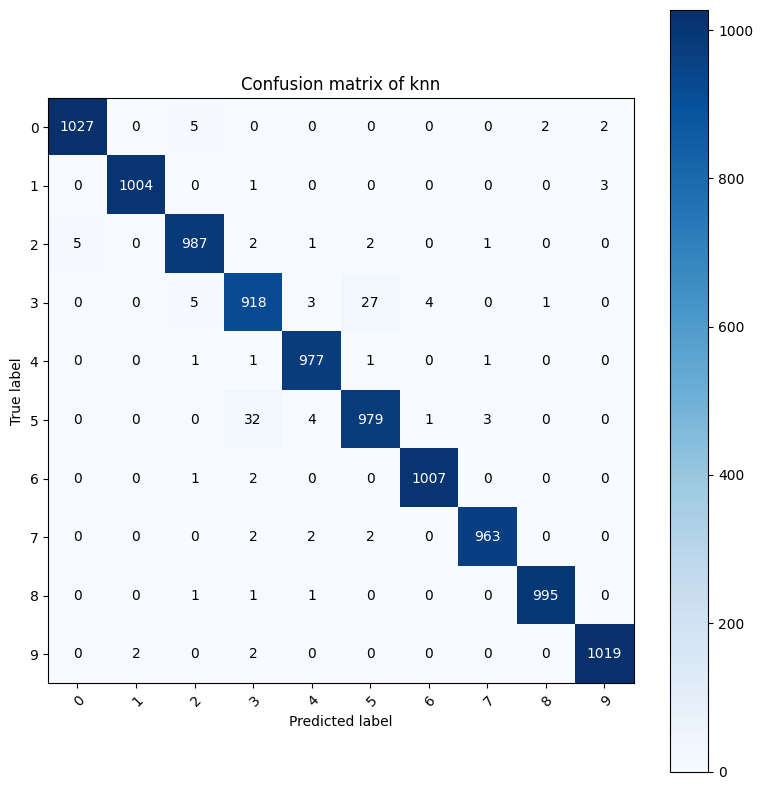

In [ ]:
cmknn_1 = confusion_matrix(y_test_1, knn_1.predict(X_test_1), labels=None, sample_weight=None)
print(cmknn_1)
plt.rcParams["figure.figsize"] = (8,8)
plot_confusion_matrix(y_test_1, knn_1.predict(X_test_1), classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix of knn')

#DATASET 2

##Load Data

In [ ]:
X_2,Y_2 = load_data("/content/drive/MyDrive/Colab Notebooks/Machine Learning Exercises/Homework 1/dataset2.csv")

##Preprocess

Choose a type of preprocess for prepare the raw data so that it is suitable for training

In [ ]:
type_of_preprocessing = ['standard', 'minmax', 'normalize', None]
metric_for_normalization = ['l1', 'l2', 'max']

pre = type_of_preprocessing[0]

if(pre == 'standard'):
  scaler = preprocessing.StandardScaler()
  scaler.fit_transform(X_2)
elif(pre == 'minmax'):
  scaler = preprocessing.MinMaxScaler()
  scaler.fit_transform(X_2)
elif(pre == 'normalize'):
  n = metric_for_normalization[0] # used to normalize each non zero sample
  X_2 = preprocessing.normalize(X_2,norm=n)

**Print**

In [ ]:
print("Input shape: %s" %str(X_2.shape))
print("Output shape: %s" %str(Y_2.shape))
print("Number of attributes/features: %d" %(X_2.shape[1]))
print("Number of samples: %d" %(X_2.shape[0]))

# show an example
id = random.randrange(0,X_2.shape[0])

print("Example:")
print("x%d = %r" %(id,X_2[id]))
print("y%d = %r" %(id,Y_2[id]))

Input shape: (50000, 1000)
Output shape: (50000,)
Number of attributes/features: 1000
Number of samples: 50000
Example:
x9841 = array([0.00000000e+00, 6.30812943e-01, 0.00000000e+00, 1.63079262e+00,
       0.00000000e+00, 0.00000000e+00, 1.79547593e-01, 2.46614846e-03,
       5.34803987e-01, 1.81018963e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.03868109e-01, 1.18698515e-01, 0.00000000e+00,
       0.00000000e+00, 5.30377328e-02, 6.19286776e-01, 0.00000000e+00,
       3.17451209e-01, 1.28383172e+00, 0.00000000e+00, 2.67147630e-01,
       0.00000000e+00, 0.00000000e+00, 3.40605468e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.75716871e-01, 4.42667231e-02,
       6.26858175e-02, 0.00000000e+00, 3.74372810e-01, 2.02545784e-02,
       4.25970823e-01, 4.47072804e-01, 0.00000000e+00, 4.37925816e-01,
       3.50047499e-01, 3.61281186e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78946608e-01,
       8.57362896e-0

##Split Data

In [ ]:
# 80% train set, 20% test set

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=15)

**Print**

In [ ]:
print("Size of training set: %d" %X_train_2.shape[0])
print("Size of test set: %d" %X_test_2.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train_2[id]))
print("    y_train_%d = %r" %(id,y_train_2[id]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test_2[id]))
print("    y_test_%d = %r" %(id,y_test_2[id]))

Size of training set: 40000
Size of test set: 10000
First training sample
    x_train_0 = array([0.00000000e+00, 1.49645463e-01, 0.00000000e+00, 1.46847177e+00,
       0.00000000e+00, 0.00000000e+00, 8.71060431e-01, 1.25646651e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.83695301e-01,
       0.00000000e+00, 4.59071368e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.20024341e-01, 1.66986930e+00, 1.76643819e-01,
       0.00000000e+00, 8.80406260e-01, 2.44142383e-01, 8.75222862e-01,
       0.00000000e+00, 0.00000000e+00, 2.40103099e-02, 4.16346073e-01,
       0.00000000e+00, 0.00000000e+00, 1.63496569e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.45907938e-01, 6.90098032e-02,
       5.95856369e-01, 7.18910918e-02, 7.27778226e-02, 5.74632525e-01,
       0.00000000e+00, 3.71352464e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.83760747e-01, 0.00000000e+00, 1.22244644e+00,
       3.84452939e-01, 4.25376505e-01, 0.00000000e+00, 0.0

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


<BarContainer object of 10 artists>

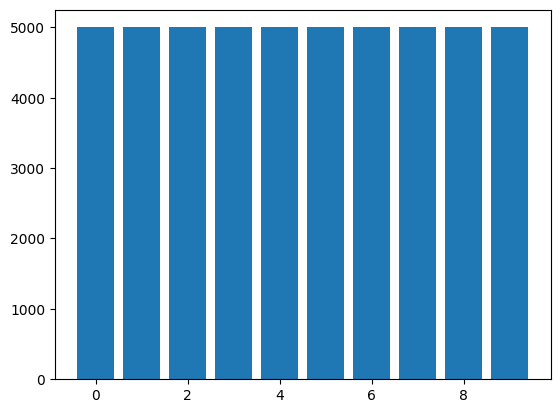

In [ ]:
class_values = {}
for i in range(0,10):
  class_values[i]=0
for c in Y_2:
  class_values[c]+=1
print(class_values)
plt.bar(class_values.keys(),class_values.values())

#LEARNING 2

##Create a models and Cross Validation

**Decision Tree**

In [ ]:
#hyperparameters: criteria of the split, strategy to split at each node, maximum depth of the tree
set_of_criteria = ['gini', 'entropy', 'log_loss']
type_of_split = ['best', 'random']
max_depth = np.array(range(1,31))

# K-Fold Cross-Validation

crit = set_of_criteria[0]
split = type_of_split[0]
depth = max_depth[0]
max_accuracy = 0.0

for c in set_of_criteria:
  for s in type_of_split:
    for d in max_depth:
      dt = tree.DecisionTreeClassifier(criterion=c, splitter=s, max_depth=d)
      score = cross_val_score(dt, X_train_2, y_train_2, cv=5, scoring='accuracy').mean()
      if(score > max_accuracy):
        max_accuracy = score
        crit = c
        split = s
        depth = d

print('the hyperparameters choosen are criterion=%s, split=%s, depth=%s and the max accuracy is %.3f' %(crit,split,str(depth),max_accuracy))

the hyperparameters choosen are criterion=gini, split=best, depth=13 and the max accuracy is 0.958


In [ ]:
decision_tree_2 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=13)

**SVM**

In [ ]:
#hyperparameters:  kernel, degree of the polynomial function if kernel=='poly' (ignored by all other kernels), kernel coefficient for 'rbf', 'poly' and 'sigmoid' (gamma)
degree_range = [1,2,3]
kernel_set = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_set = ['scale','auto']

# K-Fold Cross-Validation

kernel_name  = kernel_set[0]
num_degree = degree_range[0]
g = gamma_set[0]
max_accuracy = 0.0

for k in kernel_set:
  for d in degree_range:
    for gg in gamma_set:
      if k!='linear':
        if k=='poly':
          sc=svm.SVC(C=1.0, kernel=k, degree=d, gamma=gg)
        else:
          sc=svm.SVC(C=1.0, kernel=k, gamma=gg)
      else:
        sc=svm.SVC(C=1.0, kernel=k)
      score = cross_val_score(sc, X_train_2, y_train_2, cv=5, scoring='accuracy').mean()
      if(score > max_accuracy):
        max_accuracy = score
        g = gg
        num_degree = d
        kernel_name = k

print('the hyperparameters choosen are kernel=%s, degree=%s, gamma=%s and the max accuracy is %.3f' %(kernel_name,str(num_degree),g,max_accuracy))

the hyperparameters choosen are kernel=poly, degree=3, gamma=scale and the max accuracy is 0.974


In [ ]:
svm_c_2 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='scale')

**KNN**

In [ ]:
#hyperparameters: number of nearest neighbors, weight function, Algorithm used to compute the nearest neighbors
neighbors_range = np.array(range(1,11))
weight_set = ['uniform','distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
#K-Fold Cross-Validation

num_neighbors = neighbors_range[0]
weight_type = weight_set[0]
alg = algorithms[0]
max_accuracy=0.0

for n in neighbors_range:
  for w in weight_set:
    for a in algorithms:
      nn=KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
      score = cross_val_score(nn, X_train_2, y_train_2, cv=5, scoring='accuracy').mean()
      if(score > max_accuracy):
        max_accuracy = score
        num_neighbors = n
        weight_type = w
        alg = a

print('the hyperparameters choosen are number of neighbors=%s, weights=%s, algorithm=%s and the max accuracy is %.3f' %(str(num_neighbors),weight_type,alg,max_accuracy))

the hyperparameters choosen are number of neighbors=10, algorithm=distance, depth=auto and the max accuracy is 0.972


In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto')

##Fit the models

In [ ]:
decision_tree_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(max_depth=13)

In [ ]:
svm_c_2.fit(X_train_2, y_train_2)

SVC(kernel='poly')

In [ ]:
knn_2.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=10, weights='distance')

##Evaluate the models

###Accuracy

In [ ]:
acc1_2 = decision_tree_2.score(X_test_2, y_test_2)
print("Accuracy of decision tree is %.3f" %acc1_2)

Accuracy of decision tree is 0.956


In [ ]:
acc2_2 = svm_c_2.score(X_test_2, y_test_2)
print("Accuracy of SVM is %.3f" %acc2_2)

Accuracy of SVM is 0.973


In [ ]:
acc3_2 = knn_2.score(X_test_2, y_test_2)
print("Accuracy of KNN is %.3f" %acc3_2)

Accuracy of KNN is 0.971


###Precision and Recall

In [ ]:
print("Precision and Recall table of decision tree is:")
print(classification_report(y_test_2, decision_tree_2.predict(X_test_2), labels=None, target_names=['0','1','2','3','4','5','6','7','8','9'], digits=3))

Precision and Recall table of decision tree is:
              precision    recall  f1-score   support

           0      0.974     0.972     0.973      1036
           1      0.982     0.978     0.980      1008
           2      0.965     0.947     0.956       998
           3      0.877     0.892     0.885       958
           4      0.938     0.959     0.949       981
           5      0.900     0.914     0.907      1019
           6      0.979     0.970     0.975      1010
           7      0.974     0.962     0.968       969
           8      0.989     0.987     0.988       998
           9      0.982     0.977     0.979      1023

    accuracy                          0.956     10000
   macro avg      0.956     0.956     0.956     10000
weighted avg      0.956     0.956     0.956     10000



In [ ]:
print("Precision and Recall table of SVM is:")
print(classification_report(y_test_2, svm_c_2.predict(X_test_2), labels=None, target_names=['0','1','2','3','4','5','6','7','8','9'], digits=3))

Precision and Recall table of SVM is:
              precision    recall  f1-score   support

           0      0.981     0.986     0.984      1036
           1      0.989     0.988     0.989      1008
           2      0.976     0.963     0.969       998
           3      0.907     0.931     0.919       958
           4      0.976     0.972     0.974       981
           5      0.942     0.930     0.936      1019
           6      0.986     0.986     0.986      1010
           7      0.985     0.983     0.984       969
           8      0.992     0.995     0.993       998
           9      0.989     0.987     0.988      1023

    accuracy                          0.973     10000
   macro avg      0.972     0.972     0.972     10000
weighted avg      0.973     0.973     0.973     10000



In [ ]:
print("Precision and Recall table of KNN is:")
print(classification_report(y_test_2, knn_2.predict(X_test_2), labels=None, target_names=['0','1','2','3','4','5','6','7','8','9'], digits=3))

Precision and Recall table of KNN is:
              precision    recall  f1-score   support

           0      0.977     0.985     0.981      1036
           1      0.988     0.989     0.989      1008
           2      0.969     0.966     0.967       998
           3      0.908     0.922     0.915       958
           4      0.975     0.975     0.975       981
           5      0.941     0.921     0.931      1019
           6      0.983     0.986     0.985      1010
           7      0.982     0.982     0.982       969
           8      0.992     0.995     0.993       998
           9      0.990     0.985     0.988      1023

    accuracy                          0.971     10000
   macro avg      0.971     0.971     0.971     10000
weighted avg      0.971     0.971     0.971     10000



###Confusion Matrix

[[1007    0    9    1    5    1    5    4    4    0]
 [   1  986    0    2    0    1    0    0    5   13]
 [  13    0  945   11   15    6    5    2    0    1]
 [   1    1   10  855   10   70    6    4    1    0]
 [   3    0    5   12  941    9    2    9    0    0]
 [   1    0    1   69   11  931    1    5    0    0]
 [   1    1    6   13    6    2  980    0    0    1]
 [   3    1    2    8   10   13    0  932    0    0]
 [   4    1    1    1    1    0    2    0  985    3]
 [   0   14    0    3    4    1    0    1    1  999]]


<Axes: title={'center': 'Confusion matrix of decision tree'}, xlabel='Predicted label', ylabel='True label'>

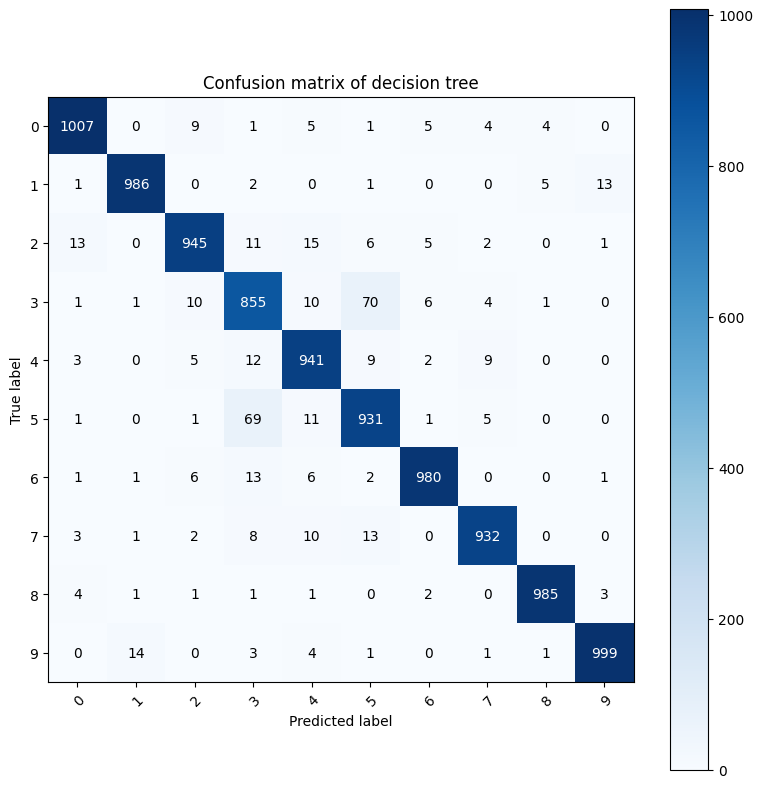

In [ ]:
cmd_2 = confusion_matrix(y_test_2, decision_tree_2.predict(X_test_2), labels=None, sample_weight=None)
print(cmd_2)
plt.rcParams["figure.figsize"] = (8,8)
plot_confusion_matrix(y_test_2, decision_tree_2.predict(X_test_2), classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix of decision tree')

[[1022    0    5    2    1    0    0    1    4    1]
 [   0  996    0    0    0    0    0    0    2   10]
 [  13    0  961    5    6    3    8    2    0    0]
 [   1    0    9  892    7   42    4    2    1    0]
 [   1    0    5   11  954    6    1    3    0    0]
 [   0    0    0   59    5  948    1    6    0    0]
 [   1    1    3    6    2    1  996    0    0    0]
 [   2    0    0    6    2    6    0  953    0    0]
 [   2    1    2    0    0    0    0    0  993    0]
 [   0    9    0    2    0    0    0    1    1 1010]]


<Axes: title={'center': 'Confusion matrix of SVM'}, xlabel='Predicted label', ylabel='True label'>

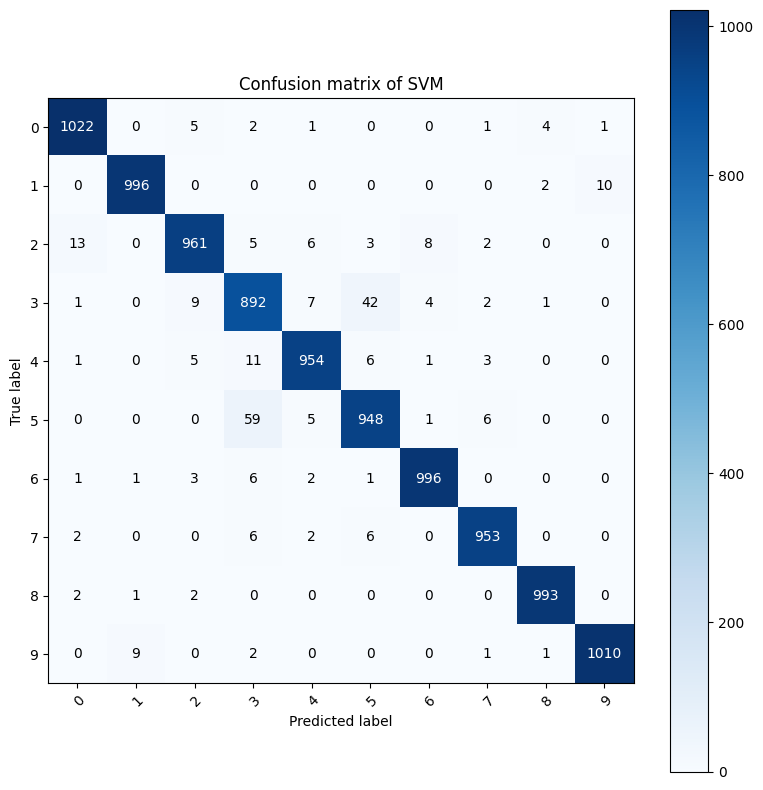

In [ ]:
cmsvm_2 = confusion_matrix(y_test_2, svm_c_2.predict(X_test_2), labels=None, sample_weight=None)
print(cmsvm_2)
plt.rcParams["figure.figsize"] = (8,8)
plot_confusion_matrix(y_test_2, svm_c_2.predict(X_test_2), classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix of SVM')

[[1020    0    7    1    0    0    0    1    5    2]
 [   1  997    1    0    0    0    0    0    1    8]
 [  13    0  964    3    5    3    7    3    0    0]
 [   1    0   11  883    7   46    7    2    1    0]
 [   2    0    4   10  956    4    2    3    0    0]
 [   0    0    0   65    7  939    1    7    0    0]
 [   1    1    6    3    2    1  996    0    0    0]
 [   3    0    0    5    4    5    0  952    0    0]
 [   2    1    2    0    0    0    0    0  993    0]
 [   1   10    0    2    0    0    0    1    1 1008]]


<Axes: title={'center': 'Confusion matrix of knn'}, xlabel='Predicted label', ylabel='True label'>

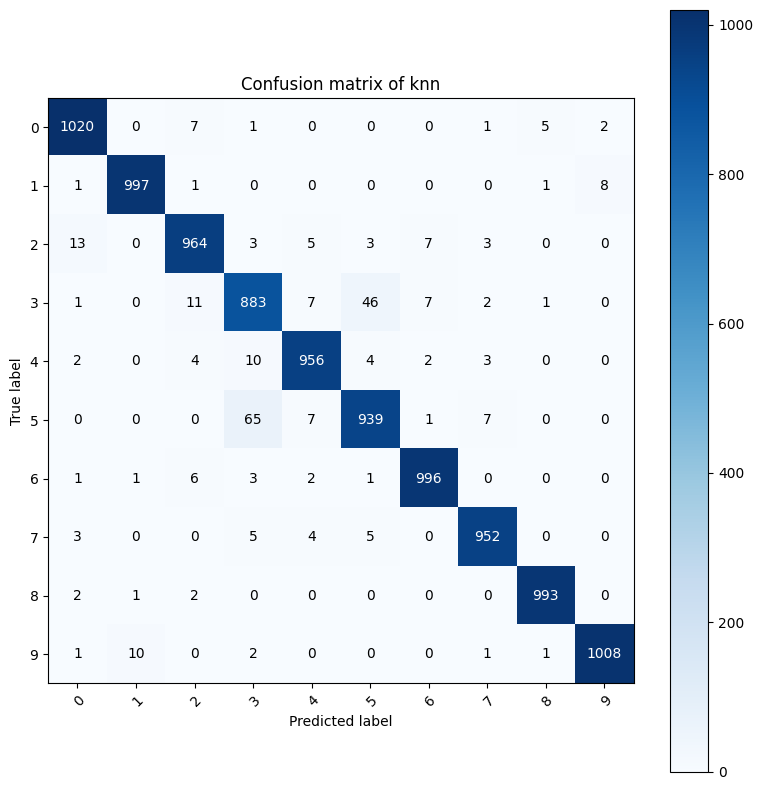

In [ ]:
cmknn_2 = confusion_matrix(y_test_2, knn_2.predict(X_test_2), labels=None, sample_weight=None)
print(cmknn_2)
plt.rcParams["figure.figsize"] = (8,8)
plot_confusion_matrix(y_test_2, knn_2.predict(X_test_2), classes=['0','1','2','3','4','5','6','7','8','9'], normalize=False, title='Confusion matrix of knn')

#PREDICTION ON BLIND TESTS

##Blind test 1

###Load Data

In [ ]:
X_blind_test_1,y_temp = load_data("/content/drive/MyDrive/Colab Notebooks/Machine Learning Exercises/Homework 1/blind_test1.csv")

In [ ]:
print("Size of set: %d" %X_blind_test_1.shape[0])

Size of set: 10000


###Predict

In [ ]:
prediction_set_1 = open("/content/drive/MyDrive/Colab Notebooks/Machine Learning Exercises/Homework 1/prediction_set_1.csv","w",newline="")
writer = csv.writer(prediction_set_1)

predict = svm_c_1.predict(X_blind_test_1)

for i in range(0,len(predict)):
    writer.writerow([predict[i]])

##Blind test 2

###Load Data

In [ ]:
X_blind_test_2,y_temp = load_data("/content/drive/MyDrive/Colab Notebooks/Machine Learning Exercises/Homework 1/blind_test2.csv")

In [ ]:
print("Size of set: %d" %X_blind_test_2.shape[0])

Size of set: 10000


###Predict

In [ ]:
prediction_set_2 = open("/content/drive/MyDrive/Colab Notebooks/Machine Learning Exercises/Homework 1/prediction_set_2.csv","w",newline="")
writer = csv.writer(prediction_set_2)

predict = svm_c_2.predict(X_blind_test_2)

for i in range(0,len(predict)):
    writer.writerow([predict[i]])